# SciKit-Learn - Model Selection

- This lecture is all about how to train, evaluate and optimize your models with good methodology.
- We'll look into how to create a train set and a test set with a train test split.
- We'll also look into how to validate your model with cross validation.

### Trainset / Testset

- In machine learning, you never want to evaluate the performance of your model with the same data that you used to train your model.
- You want your sets to be different because otherwise we're feeding in information that the model has already seen.
- A common split is 80% for training, and 20% for testing, but others exist.
    - Train data:
        - model.fit(X{train}, y{train})
    - Test data:
        - model.score(X{test}, y{test})
- We have functions to help us do this already in the scikit-learn library.
    - In the module sklearn.model_selection we find many functions that allow us to prepare our data set for our X and y variables.
- train_test_split is a function in this module that helps us easily divide up our data.
- First we're going to import our data..

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)

(150, 4)


- Now we import our train_test_split method from the model_selection module to help us divide up our data.
- The test_size argument tells the train_test_split function what the percentage division should be for the data.

In [3]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


- We can take a look at our sets by just plotting them.
- Something to note about how the split is performed: all the data is mixed before the split so the split is as random as posible; for this reason, each time the train_test_split is called the division of the data will look a little bit different.
- If you want to provide your own seed so that you can get the same division as another time in the past, you can define the "random_state" keyword argument.
    - This acts the same as a seed in the rand function.

Text(0.5, 1.0, 'Test set')

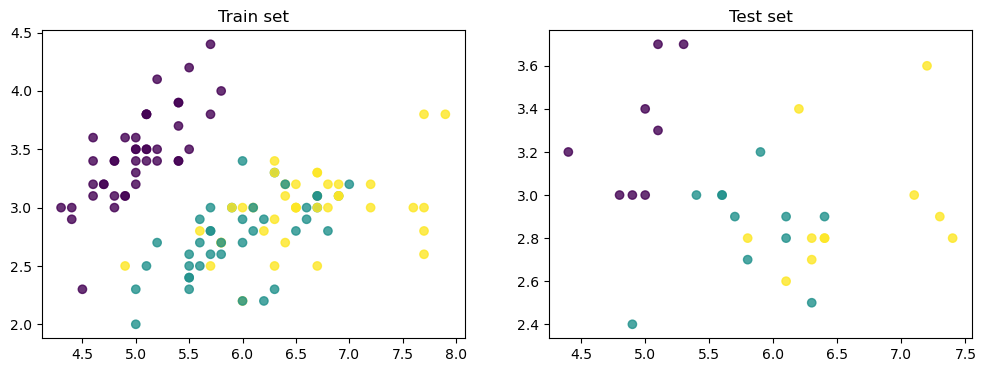

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

- Next we use our train data with the fit method to train our model.
- Then we'll score it and see our score (coefficient of determination).

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9


- We get a coefficient of determination of 1 which means that our test data fits in our training data perfectly well.
- However, this doesn't necessarily mean that the model is perfect and will predict the correct outcome 100% of the time.
- If we test it with data that it has never seen before (like the test_set data), we see that the coefficient to determination is lower.


### Validation Set - Improving the Model

- left off here: https://www.youtube.com/watch?v=w_bLGK4Pteo&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=22 